<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/3_01_K%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이번에는 겨울에 대방어철로 대방어 주문이 크게 늘어서
MBC 마켓에서 업계 최초로 대방어를 무게단위로 판매하려고 함
무게단위로 판매를하면 가격 책정도 원활하고 고객도 합리적으로 판단을 할 수 있다.
그런데 공급처에서 생선 무게를 잘못 측정해서 보낼 수도 있다


---


대방어의 무게를 재측정해야한다.
다른 데이터는 정상범위가 있으니 예측할 수 있을까?
이렇게 **예측하는 것을 회귀**라고한다.
샘플데이터가 필요하다!
외부에서 56개의 샘플을 받아서 처리해보자
지도학습은 크게 2가지로 나눠진다.


---


분류 (2진분류) : from sklearn.neighbors import KNeighborsClassifier
회귀 (예측) : 확률(임의의 어떤 숫자로 예측) : from sklearn.neighbors import KNeighborsRegressor
회귀 : 두 변수 사이의 상관관계를 분석하는 방법

In [ ]:
# 리눅스 명령어로 코랩 가상머신에 폰트를 설치/적용하는 명령어
# 차트 한글처리용
!sudo apt-get install -y fonts-nanum # !sudo 가상머신 명령어처리(관리자권한)
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf # 설치 후에 세션 다시 시작!

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 대방어의 샘플자료 56개
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]) # 대방어의 길이 배열리스트
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]) # 대방어의 무게 배열리스트

기초자료


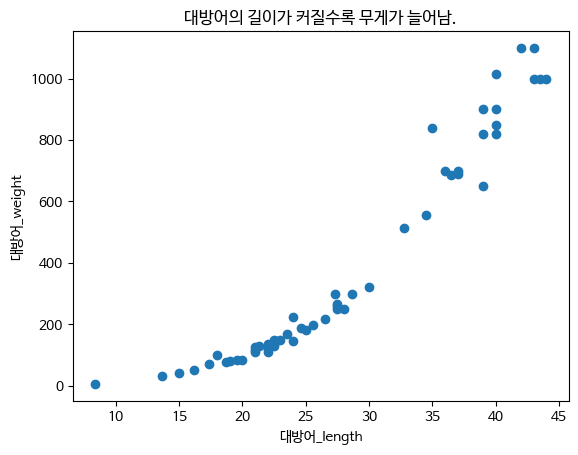

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
plt.scatter(perch_length,perch_weight)
plt.xlabel('대방어_length')
plt.ylabel('대방어_weight')
print('기초자료')
plt.title('대방어의 길이가 커질수록 무게가 늘어남.')
plt.show()
# 산점도를 그리고 나니 길이가 커짐에 따라 무게도 늘어남
# 이 대이터를 토대로 훈련과 score를 내보자

In [ ]:
# K-최근접 이웃 알고리즘에서의 회귀 KNeighborsRegressor
# 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.
# 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측함
#  k=3이라고 가정하면 2개의 다수가있어 분류는 사각형으로 판단
# 회귀는 샘플에 가장 가까운 샘플 k개를 선택
# target 값 100, 80, 60을 더해 3으로 나는 평균이 target 값으로 사용됨

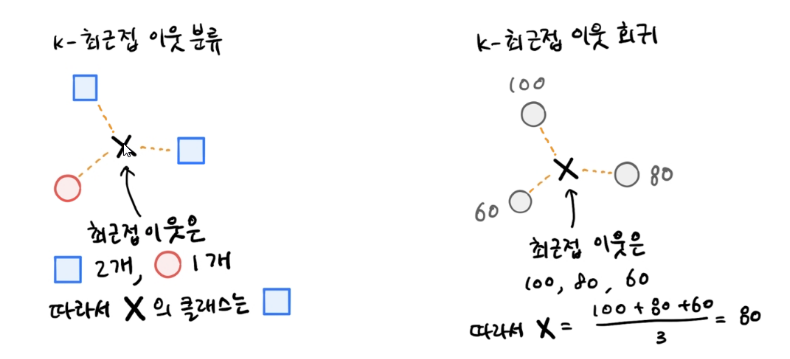

In [ ]:
# 사이킷런에서 제공하는 훈련세트, 테스트세트 생성
from sklearn.model_selection import train_test_split

# 1줄로 쓸 것
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)
#                                                                      input       target

# stratify 사용하지 않음(2진분류용) -> 정답파일이 무게 확률이기 때문에
# 사이킷 런의 train_test_split 함수를 사용해 훈련/테스트 세트로 나눔
# random_state = 42 서로 같은 테스트를 위해 시드값 제공

# 사이킷 런에 사용할 훈련 세트는 2차원 배열을 사용함
# perch_length가 1차원배열이기 때문에 이를 나눈 train_input과 test_input도 1차원 배열임
#[3,] -> [3,1] 2차원 배열을 사용해야하므로 억지로 변롼 reshape() 메서드 활용 (4,)->(2,2)

In [ ]:
test_array = np.array([1,2,3,4])
print(test_array.shape) # 현재 1차원 배열로 나오는데 이것을 억지로 2차원 배열처리 해야함

(4,)


In [ ]:
# 2차원 배열로 변환
test_array = test_array.reshape(2,2) # 억~지로 2차원 배열 만드는 메서드
print(test_array.shape)
# 전에는 2개의 특성으로 사용했었기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용했었지만
# 이번에는 특성이 1개기 때문에 수동으로 2차원 배열을 만들어야함 -> numpy의 reshape() 를 활용
# (4,)->(2,2) 크기로 바꿔줌

(2, 2)


In [ ]:
print(test_array)

[[1 2]
 [3 4]]


In [ ]:
# 입력데이터인 train_input과 test_input을 2차원 배열로 바꾸어야함
# train_input(42,) -> (42,1)
# numpy는 배열의 크기를 자동으로 지정하는 기능도 제공, -1값을 넣으면된다.
train_input = train_input.reshape(-1,1) # -1 로 지정하면 원소개수로 모드 채우라는 의미
test_input = test_input.reshape(-1,1) # 1은 두번째 크기를 1로
print(train_input.shape,test_input.shape) # -1을 사용하면 매번 원소의 크기를 외우지 않아도 됨

(42, 1) (14, 1)


In [ ]:
print(train_input) # 데이터 전처리 끝

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [ ]:
# 훈련시작
from sklearn.neighbors import KNeighborsRegressor # 회귀 알고리즘용 구현클래스
# KNeighborsClassifier 분류용
knr = KNeighborsRegressor() # 회귀용 객체 생성
# K-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input,train_target) # 회귀용으로 훈련
#            길이       무게

KNeighborsRegressor()

In [ ]:
knr.score(test_input,test_target) # 99.28%
# 분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율(정확도) -> 예측값
# 회귀인 경우에는 평가를 결정계수라고함. R^2
# R^2 = 1 = ((타깃-예측)^2의 합) / ((타깃-평균)^2의 합)임
# 타깃의 평균 정도를 예측하는 수주 ㄴ-> R^2는 0에 가까워지고,
# 예측이 타깃에 가까워지면 1에 가까운 결과 99.28%로 예측이 가능한 수준

0.992809406101064

In [ ]:
knr.predict([[15]]) # 알고싶은 값 출력 / 15cm라면 무게는?
# K-최근접한 5개의 이웃에 대해 값을 99.28%확률로 도출한 결과 (60g)

array([1010.])

In [ ]:
knr.predict([[30]])

array([311.4])

In [ ]:
knr.predict([[40]])

array([847.])

In [ ]:
 # sklearn.metrics 패키지 아래 여러가지 측정도구를 제공함
 # mean_absolute_error 절대값 오차를 평균하여 반환
 from sklearn.metrics import mean_absolute_error # 평균으로 절대값의 오차를 찾는 메서드
 # 테스트 세트에 대한 예측(prediction)을 만듭니다
 test_prediction = knr.predict(test_input)

 mae = mean_absolute_error(test_target,test_prediction)
 #테스트 세트에 대한 평균 절대값 오차를 계산
 print(mae)

19.157142857142862


In [ ]:
print(knr.score(train_input,train_target)) # 훈련한 모델을 사용해 훈련세트 점수 확인
# 96.98%
print(knr.score(test_input,test_target)) # 테스트 세트로 평가
# 99.28%

0.9698823289099254
0.992809406101064


In [ ]:
# 위 결과를 보면 모델을 훈련세트에 훈련하면 훈련세트에 잘 맞는 모델이 만들어짐
# 이 모델을 훈련세트와 테스트 세트에서 평가하면 두 값 중에 어느 것이 높을까?

# 보통 훈련세트의 점수가 조금 더 높게 나옴
# 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘면 과대적합
# 과소적합 : 훈련세트보다 테스트세트가 점수가 높은 경우, 두 점수가 모두 낮은 경우

In [ ]:
# 사이킷 런의 알고리즘 기본값을 3개로 조절해본다 (기본값:5개)
knr.n_neighbors = 3
# 모델 재훈련
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target)) # 98.04%
print(knr.score(test_input,test_target)) # 97.46%

0.9804899950518966
0.9746459963987609


In [28]:
knr.predict([[15]]) # 알고 싶은값 출력 15cm -> 47.333333g
# 5개의 이웃을 참고하는 것보다. 3개를 참고하는 것이 더 좋은 결과가 나옴

array([47.33333333])

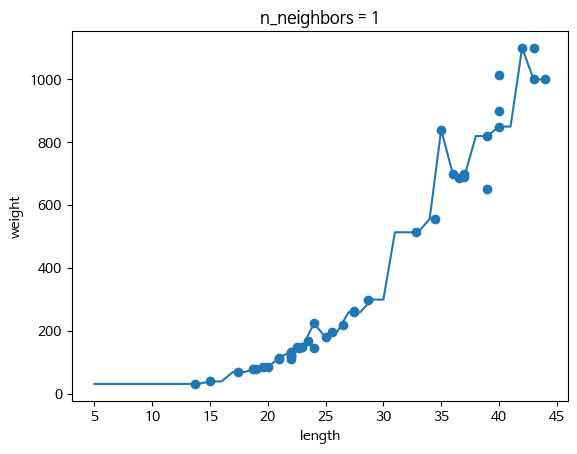

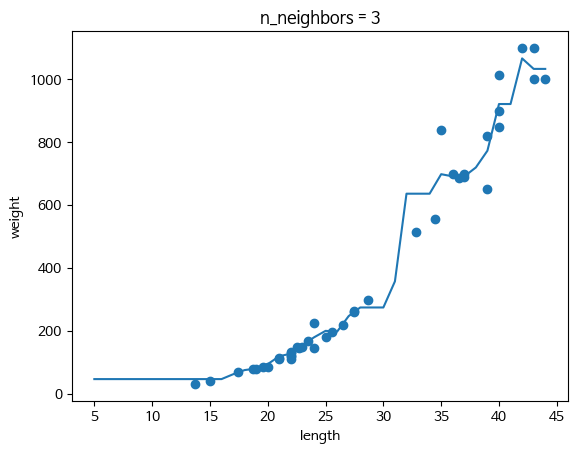

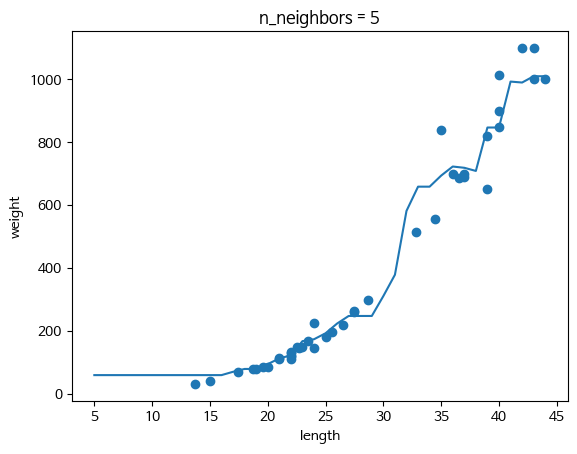

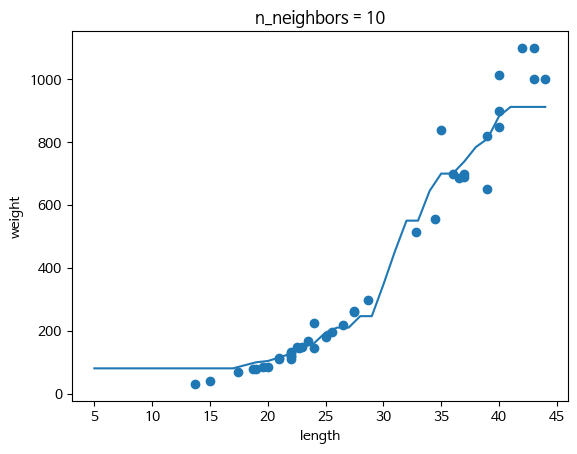

In [29]:
# 앞으로 훈련할 때 하이퍼파라미터(5->3 : 매개변수값)변경은 좋은 결과를 결정할 때 필수가 됨
# 이것을 보고서에 남겨서 선택한 결과를 표출해야 함
# 그런데 이것을 사람이 값을 수동으로 바꿔가면서 훈련을 하면 시간 낭비가 될 수 있음으로
# 파이썬의 for문 등을 많이 사용한다.
# 하이퍼 파라미터 값은 대부분 홀수를 사용한다. (짝수인 경우에는 답이 잘 나오지 않음.)

knr = KNeighborsRegressor() # k-최근접 이웃 회귀 객체를 만듭니다
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 3, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 3, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n # 이웃 값을 1,3,5,10으로 바꿔가면서 그래프를 그려줌
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()